# Polynomial Regression vs Linear Regression

## Import libraries and dataset

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import Cleaner as cl

dataset_year_new = cl.get_and_clean_df('../data/bilhandel_unclean.csv').sort_values(by=['Årgang'])
dataset_year_new.to_csv("output.csv", sep=',')
dataset_year_new = dataset_year_new[dataset_year_new['Make'] == "Opel"]
X_year = dataset_year_new.iloc[:, 5:6] # Årgang
y_year = dataset_year_new.iloc[:, -1] # Pris

dataset_km_new = cl.get_and_clean_df('../data/bilhandel_unclean.csv').sort_values(by=['Kilometer'])
dataset_km_new = dataset_km_new[dataset_km_new['Make'] == "Opel"]
X_km = dataset_km_new.iloc[:, 4:5] # Kilometer
y_km = dataset_km_new.iloc[:, -1] # Pris

# dataset_year = pd.read_csv('../data/model.csv').sort_values(by=['year'])
# X_year = dataset_year.iloc[:, 1:2].values # Year
# y_year = dataset_year.iloc[:, -1].values # Price

# dataset_km = pd.read_csv('../data/model.csv').sort_values(by=['km'], ascending=False)
# display(dataset_km)
# X_km = dataset_km.iloc[:, 4:5].values # km
# y_km = dataset_km.iloc[:, -1].values # price
# display(y_km)

## Splitting up the dataset for training

In [42]:
from sklearn.model_selection import train_test_split

X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y_year, test_size = 0.2, random_state = 0)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y_km, test_size = 0.2, random_state = 0)




## Training the Linear Regression model

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg_year = LinearRegression()
lin_reg_km = LinearRegression()
lin_reg_year.fit(X_year_train, y_year_train)
lin_reg_km.fit(X_km_train, y_km_train)

LinearRegression()

## Training the Polynomial Regression model

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_year_reg = PolynomialFeatures(degree= 3)
poly_km_reg = PolynomialFeatures(degree= 3)

X_year_poly = poly_year_reg.fit_transform(X_year_train)
X_km_poly = poly_km_reg.fit_transform(X_km_train)

lin_reg_year_2 = LinearRegression()
lin_reg_year_2.fit(X_year_poly, y_year_train)

lin_reg_km_2 = LinearRegression()
lin_reg_km_2.fit(X_km_poly, y_km_train)

LinearRegression()

## Visualising the Linear Regression results Year

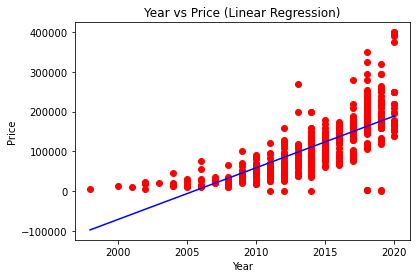

In [45]:
plt.scatter(X_year, y_year, color = 'red')
plt.plot(X_year, lin_reg_year.predict(X_year), color = 'blue')
plt.title('Year vs Price (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Linear Regression results km

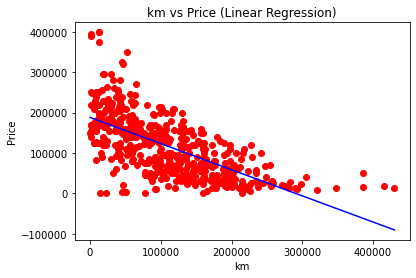

In [46]:
plt.scatter(X_km, y_km, color = 'red')
plt.plot(X_km, lin_reg_km.predict(X_km), color = 'blue')
plt.title('km vs Price (Linear Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results year

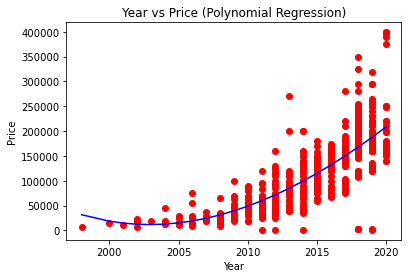

In [47]:
plt.scatter(X_year, y_year, color = 'red')
plt.plot(X_year, lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year)), color = 'blue')
plt.title('Year vs Price (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results km

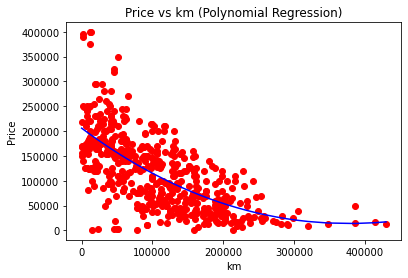

In [48]:
plt.scatter(X_km, y_km, color = 'red')
plt.plot(X_km, lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km)), color = 'blue')
plt.title('Price vs km (Polynomial Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Predicting test result with Linear Regression

In [49]:
predict_year = lin_reg_year.predict(X_year_test)

predict_km = lin_reg_km.predict(X_km_test)

np.set_printoptions(precision=2)

display(lin_reg_year.score(X_year_test, y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km.score(X_km_test, y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.535184109330548

AttributeError: 'Series' object has no attribute 'reshape'

## Predicting a new result with Polynomial Regression

In [70]:
predict_year = lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year_test))
predict_km = lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km_test))

np.set_printoptions(precision=2)

display(lin_reg_year_2.score(poly_year_reg.fit_transform(X_year_test), y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km_2.score(poly_km_reg.fit_transform(X_km_test), y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.8536825954734442

array([[696959.13, 697080.9 ],
       [733787.8 , 728841.37],
       [733787.8 , 744509.1 ],
       [724397.05, 725269.76],
       [718895.19, 712839.9 ],
       [734737.03, 730478.  ]])

0.4339326698309798

array([[703783.05, 695444.1 ],
       [723707.54, 729323.05],
       [732120.08, 711827.64],
       [717958.2 , 728019.03],
       [716606.17, 728841.37],
       [737106.04, 744509.1 ]])